## Objectif :
Analyser les performances commerciales d’un magasin (Superstore) pour :
- Identifier les produits, régions et segments clients les plus rentables,
- Détecter les pertes et zones d’optimisation,
- Proposer des recommandations stratégiques.


## Importation des packages

In [1]:
pip install  Jinja2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import scipy.stats as stats 
import scipy.stats as st
import pingouin as pg



## Importation, nettoyage et préparation des données.

### Importation et exploration des données

In [3]:
# Importation des données
df = pd.read_csv("Sample.csv", encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
# Dimension des données
df.shape

(9994, 21)

In [5]:
# Information sur les données.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### Nettoyage des données 

In [6]:
# Recherche des valeurs manquantes
print("Le nombre de valeurs manquantes dans les différentes colonnes est:",df.isnull().sum())

Le nombre de valeurs manquantes dans les différentes colonnes est: Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


Nos données ne contiennent pas de valeurs manquantes

In [7]:
# Recherche des doublons.
df.duplicated(keep=False).sum()

np.int64(0)

Nos données ne contiennent pas de doublons.

In [8]:
# Vérification des valeurs abrrantes
print(df[['Sales', 'Profit', 'Quantity', 'Discount']].describe())

              Sales       Profit     Quantity     Discount
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001    28.656896     3.789574     0.156203
std      623.245101   234.260108     2.225110     0.206452
min        0.444000 -6599.978000     1.000000     0.000000
25%       17.280000     1.728750     2.000000     0.000000
50%       54.490000     8.666500     3.000000     0.200000
75%      209.940000    29.364000     5.000000     0.200000
max    22638.480000  8399.976000    14.000000     0.800000


In [9]:
# Filtrer les rémise 'Discount' trop élévés
print(df[df['Discount'] > 1])

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]


### Préparation des données

In [10]:
# Conversion de ""Ship Date"" et "Order Date" en format date
df["Order Date"]=pd.to_datetime (df['Order Date'])
df["Ship Date"]=pd.to_datetime (df['Ship Date'])

In [11]:
#  Vérification du types des données(Pour s'assurer de la réussite du formatage des dates)
df=df.sort_values(by=['Order Date','Ship Date'], ascending=False)
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [12]:
# Création de la colonne taux de marge  en %
df['Marge(%)']=(df['Profit']/df['Sales'])*100
# Création de la colonne durrée de livraison en jours
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
# Création de la variable Mois de la commande
df['Month'] = df['Order Date'].dt.month 
df['Years'] = df['Order Date'].dt.year
df['Year_Month'] = df['Order Date'].dt.to_period('M').astype(str)  # format AAAA-MM


In [13]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Marge(%),Delivery_Days,Month,Years,Year_Month
645,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110,27.00,6,12,2017,2017-12
906,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176,3.75,4,12,2017,2017-12
907,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,3.00,4,12,2017,2017-12
908,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,37.50,4,12,2017,2017-12
1296,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,32.50,4,12,2017,2017-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,25.00,7,1,2014,2014-01
739,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Avery 508,11.784,3,0.2,4.2717,36.25,4,1,2014,2014-01
740,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,-23.75,4,1,2014,2014-01
741,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,-155.00,4,1,2014,2014-01


## Analyse Exploratoire des Données (EDA)

### Calcul des indicateurs globaux

In [14]:
# Résumé des données de la ventes
indicateurs= {
    'Total des ventes (CA) $' : df['Sales'].sum(),
    'Total des profits($)' : df['Profit'].sum(),
    'Rémise moyenne (Discount %)' : df['Discount'].mean(),
    'Quantité totale vendue' : df['Quantity'].sum(),
    'Marge moyenne (%)' : df['Marge(%)'].mean(),
    'Nombre de commandes': df['Order ID'].nunique(),
    'Nombre de clients': df['Customer ID'].nunique(),
    'Nombre de produits différents' : df['Product Name'].nunique(),
    'Délai_moyen_livraison' :  df['Delivery_Days'].mean(),
    'Quantité_moyenne_commande': (df['Quantity'].sum())/(df['Order ID'].nunique())
}
indicateurs_df = pd.DataFrame.from_dict(indicateurs, orient='index', columns=["Valeur"])
indicateurs_df.style.format("{:,.2f}")

,Valeur
Total des ventes (CA) $,"2,297,200.86"
Total des profits($),"286,397.02"
Rémise moyenne (Discount %),0.16
Quantité totale vendue,"37,873.00"
Marge moyenne (%),12.03
Nombre de commandes,"5,009.00"
Nombre de clients,793.00
Nombre de produits différents,"1,850.00"
Délai_moyen_livraison,3.96
Quantité_moyenne_commande,7.56


### Interprétation des résultats :
- Le chiffre d'affaires total est de plus de 2,29 millions de dollars.
- Le profit global représente environ 286 000 $, soit un taux de marge moyen d'environ 12%, ce qui est correct mais améliorable.
- Environ 37 000 produits ont été vendus, pour un peu plus de 5 000 commandes, ce qui donne en moyenne  environ 7 articles par commande.
- La base client est significative avec 793 clients uniques, ce qui montre un bon potentiel de segmentation.
- Une grande diversité de produits (1 800+) renforce le besoin d’une analyse par catégorie.
- Le délai de livraison moyen d'environ 4 jours est acceptable, mais pas optimal pour fidéliser ou convertir les clients.

## Analyse géographique: Régions, Pays et villes

#### Analyse des performances régionales.

In [15]:
region_perf = df.groupby('Region')[['Sales', 'Profit', 'Quantity', 'Marge(%)']].agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Marge(%)': 'mean'
}).sort_values(by='Sales', ascending=False)

region_perf['Part de marché (%)'] = round((region_perf['Sales'] / (df['Sales'].sum())) * 100)

region_perf.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge(%)': '{:.2f}%',
    'Part de marché (%)' : '{:.2f}%'
    })

,Sales,Profit,Quantity,Marge(%),Part de marché (%)
Region,,,,,
West,"$725,458","$108,418","12,266",21.95%,32.00%
East,"$678,781","$91,523","10,618",16.72%,30.00%
Central,"$501,240","$39,706","8,780",-10.41%,22.00%
South,"$391,722","$46,749","6,209",16.35%,17.00%


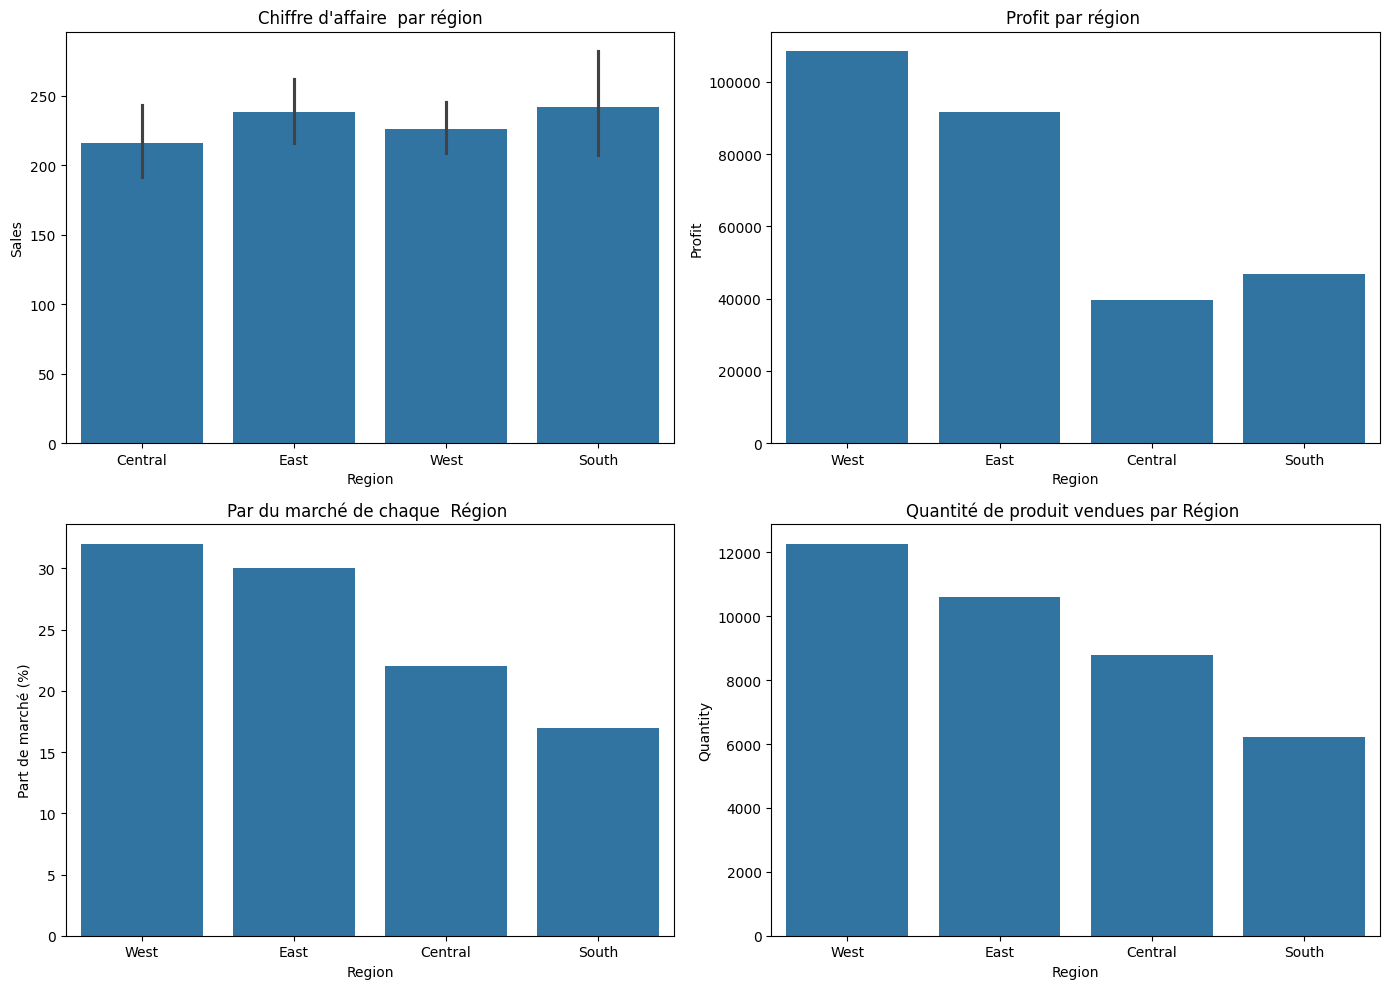

In [16]:
# Visualisation graphique des performances par région
# Part de marché par région
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Graphique 1 : Chiffre d'affaire  par région
sns.barplot(data=df, x='Region', y='Sales', ax=axs[0, 0])
axs[0, 0].set_title("Chiffre d'affaire  par région")

# Graphique 2 : profit par Région
sns.barplot(data=region_perf, x='Region', y='Profit', ax=axs[0, 1])
axs[0, 1].set_title("Profit par région ")

# Graphique 3 : Par du marché de chaque  Région 
sns.barplot(data=region_perf, x='Region', y='Part de marché (%)', ax=axs[1, 0])
axs[1, 0].set_title("Par du marché de chaque  Région ")

# Graphique 4 : ventes par expéditeur
sns.barplot(data=region_perf, x='Region', y='Quantity', ax=axs[1, 1])
axs[1, 1].set_title("Quantité de produit vendues par Région ")

plt.tight_layout()
plt.show()


### Interprétation des résultats : 
- La région West (Ouest) génère le plus de ventes, mais aussi la meilleure marge moyenne (21,9 %)
- Le Centre (Central) a une marge commerciale de -10% malgré un volume important. 
- Le Sud (South) est en retrait sur les ventes mais garde une marge correcte, ce qui laisse présager une clientèle rentable mais à faible volume.



### Analyse des performances par États (State).

In [17]:
# Top 15 des états aves le plus de ventes
state_perf = df.groupby('State')[['Sales', 'Profit', 'Quantity', 'Marge(%)']].agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Marge(%)': 'mean'
}).sort_values(by='Sales', ascending=False).head(15)

state_perf.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge(%)': '{:.2f}%'
})

,Sales,Profit,Quantity,Marge(%)
State,,,,
California,"$457,688","$76,381","7,667",27.83%
New York,"$310,876","$74,039","4,224",29.84%
Texas,"$170,188","$-25,729","3,724",-34.20%
Washington,"$138,641","$33,403","1,883",27.64%
Pennsylvania,"$116,512","$-15,560","2,153",-8.60%
Florida,"$89,474","$-3,399","1,379",-1.80%
Illinois,"$80,166","$-12,608","1,845",-39.17%
Ohio,"$78,258","$-16,971","1,759",-7.38%
Michigan,"$76,270","$24,463",946,33.34%


### Interprétation des résultats:
- Certains États tels que: Texas, Pennsylvania, Florida,Illinois et Ohio  génèrent beaucoup de chiffre d'affaire  mais Occasionnent des pertes, ce qui alerte sur la rentabilité locale.
-  À l'inverse, des États à chiffre d'affaire  modéré comme New Jersey, Kentucky, Georgia,  Indiana, Virginia, Michigan,  Washington et  California  génèrent de forte marge. ILS sont hautement rentables? on peut y renforcer l’investissement.
-  Des États déficitaires en marge devront faire l’objet d’un plan correctif : soit par des réductions de remises, soit par l’arrêt de certaines offres.

##  Analyse temporelle des ventes (Mois et années).

###  Évolution annuelle des performances.

In [18]:
# Création d'un tableau qui résume les performances annuelles.
perf_annuelle = df.groupby('Years')[['Sales', 'Profit', 'Quantity', 'Marge(%)']].agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Marge(%)': 'mean'
}).reset_index()

perf_annuelle.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge(%)': '{:.2f}%'
})

,Years,Sales,Profit,Quantity,Marge(%)
0,2014,"$484,247","$49,544","7,581",11.81%
1,2015,"$470,533","$61,619","7,979",11.76%
2,2016,"$609,206","$81,795","9,837",12.98%
3,2017,"$733,215","$93,439","12,476",11.60%


### Interprétation des résultats:
- Les ventes ont augmenté régulièrement de  2014 à 2017, avec une bonne stabilité de la marge environ 12 %.
- La marge est stable d’année en année, ce qui est un bon indicateur de contrôle des coûts, mais pas d’optimisation.

### Analyse mensuelle

In [19]:
# Tableau qui résume les performances mensuelles.
perf_mensuelle = df.groupby('Year_Month')[['Sales', 'Profit', 'Quantity', 'Marge(%)']].agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Marge(%)': 'mean'
}).sort_index()

perf_mensuelle.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge(%)': '{:.2f}%'
})

,Sales,Profit,Quantity,Marge(%)
Year_Month,,,,
2014-01,"$14,237","$2,450",284,12.86%
2014-02,"$4,520",$862,159,5.18%
2014-03,"$55,691",$499,585,13.10%
2014-04,"$28,295","$3,489",536,22.89%
2014-05,"$23,648","$2,739",466,12.08%
2014-06,"$34,595","$4,977",521,11.27%
2014-07,"$33,946",$-841,550,7.76%
2014-08,"$27,909","$5,318",609,19.24%
2014-09,"$81,777","$8,328","1,000",11.77%


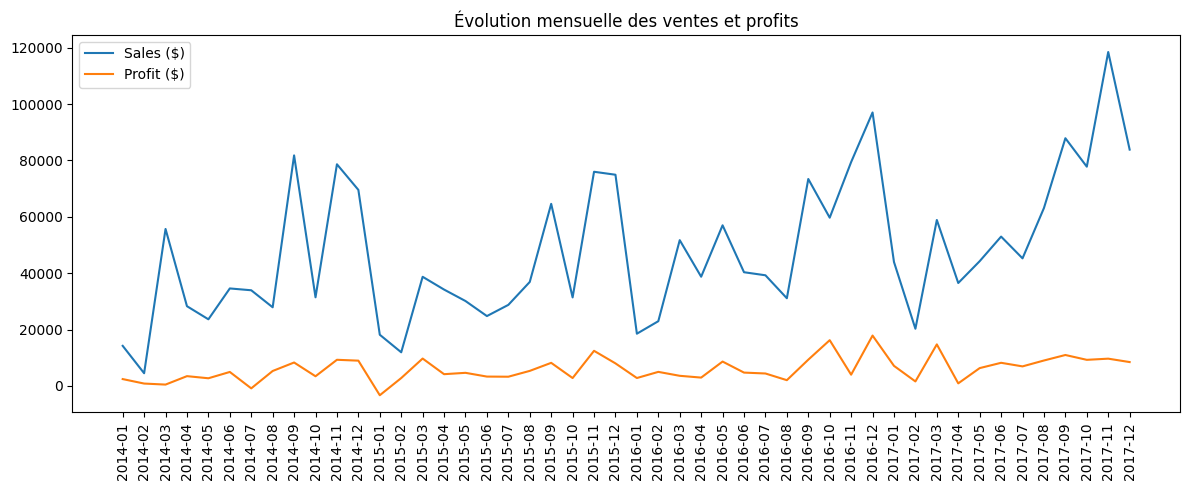

In [20]:
# Visualisation graphique
plt.figure(figsize=(12, 5))
plt.plot(perf_mensuelle.index, perf_mensuelle['Sales'], label='Sales ($)')
plt.plot(perf_mensuelle.index, perf_mensuelle['Profit'], label='Profit ($)')
plt.xticks(rotation=90)
plt.title("Évolution mensuelle des ventes et profits")
plt.legend()
plt.tight_layout()
plt.show()

### Interprétation des résultats:
- Des pics de ventes récurrents autour d'Octobre et Novembre. Cela est en rapport avec l'effet "fêtes / fin d’année".
- Certains mois montrent un fort volume de ventes mais faible profit → stratégies promotionnelles à rentabilité faible ?
- Il faudrait étudier les marges mensuelles pour détecter les périodes où des remises trop fortes affectent la rentabilité.

## Analyse des ventes par Segment de Clients et Clients.

### Calculs des indicateurs de performance par Segment

In [21]:
# Tableau qui résume les performances par segment de marché.
segment_perf = df.groupby('Segment')[['Sales', 'Profit', 'Quantity', 'Marge(%)']].agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Marge(%)': 'mean'
}).sort_values(by='Sales', ascending=False)

segment_perf['Part de marché (%)'] = round((segment_perf['Sales'] / (df['Sales'].sum())) * 100)

segment_perf.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge(%)': '{:.2f}%',
    'Part de marché (%)': '{:.2f}%'
})

,Sales,Profit,Quantity,Marge(%),Part de marché (%)
Segment,,,,,
Consumer,"$1,161,401","$134,119","19,521",11.20%,51.00%
Corporate,"$706,146","$91,979","11,608",12.12%,31.00%
Home Office,"$429,653","$60,299","6,744",14.29%,19.00%


### Interprétation graphique:
- Le segment Consumer occupe la moitié des parts de marché (51%), est le plus gros contributeur en termes de Chiffre d'affaire et de quantité vendue, mais avec la plus faible marge moyenne (11,20 %).
- Le segment Corporate est le deuxième en terme de part de marché, chiffre d'affaire et quantité de vente,  mais avec une marge légèrement supérieure à celle du segment Consumer.
- Le segment Home Office est plus modeste sur les ventes mais avec une marge plus élévée, ce qui peut indiquer un besoin de stratégies ciblées pour améliorer sa rentabilité.

### Analyse des performances par clients

#### Calculs des performances par client

In [22]:
client_perf = df.groupby(['Customer ID', 'Customer Name'])[['Sales', 'Profit', 'Quantity']].sum().reset_index()
client_perf['Marge (%)'] = (client_perf['Profit'] / client_perf['Sales']) * 100
client_perf.sort_values(by='Sales', ascending=False, inplace=True)

#### Top 10 des clients par chiffre d'affaire.

In [23]:
top_clients = client_perf.head(10)
top_clients.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge (%)': '{:,.2f}'
})

,Customer ID,Customer Name,Sales,Profit,Quantity,Marge (%)
700,SM-20320,Sean Miller,"$25,043","$-1,981",50,-7.91
741,TC-20980,Tamara Chand,"$19,052","$8,981",42,47.14
621,RB-19360,Raymond Buch,"$15,117","$6,976",71,46.15
730,TA-21385,Tom Ashbrook,"$14,596","$4,704",36,32.23
6,AB-10105,Adrian Barton,"$14,474","$5,445",73,37.62
434,KL-16645,Ken Lonsdale,"$14,175",$807,113,5.69
669,SC-20095,Sanjit Chand,"$14,142","$5,757",87,40.71
327,HL-15040,Hunter Lopez,"$12,873","$5,622",50,43.68
683,SE-20110,Sanjit Engle,"$12,209","$2,651",78,21.71
131,CC-12370,Christopher Conant,"$12,129","$2,177",34,17.95


### Interprétation des résultats:
- Ces clients génèrent les plus grosses ventes, et sont donc stratégiques.
- Vérifier leur marge permet de s’assurer qu’ils ne créent pas de valeur uniquement en volume.



### Top 10 des clients qui engendrent plus de pertes.

In [24]:
clients_perte = client_perf[client_perf['Profit'] < 0].sort_values(by='Profit').head(10)
clients_perte.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge (%)': '{:.2f}%'
})

,Customer ID,Customer Name,Sales,Profit,Quantity,Marge (%)
180,CS-12505,Cindy Stewart,"$5,690","$-6,626",40,-116.46%
310,GT-14635,Grant Thornton,"$9,351","$-4,109",26,-43.94%
459,LF-17185,Luke Foster,"$3,931","$-3,584",69,-91.18%
711,SR-20425,Sharelle Roach,"$3,233","$-3,334",34,-103.11%
322,HG-14965,Henry Goldwyn,"$3,248","$-2,798",68,-86.15%
555,NC-18415,Nathan Cano,"$2,219","$-2,205",38,-99.36%
666,SB-20290,Sean Braxton,"$8,058","$-2,083",84,-25.85%
700,SM-20320,Sean Miller,"$25,043","$-1,981",50,-7.91%
165,CP-12340,Christine Phan,"$5,888","$-1,850",59,-31.42%
560,NF-18385,Natalie Fritzler,"$8,323","$-1,696",52,-20.38%


### Interprétation des résultats:
- Certains clients peuvent engendrer des pertes récurrentes. Cela peut provenir de réductions excessive, livraisons coûteuses, etc...
- Ces cas nécessitent une analyse de politique commerciale individualisée comme:  revoir les remises ou les modalités d’expédition.



####  Top 10 clients par profit généré

In [25]:
top_profit_clients = client_perf.sort_values(by='Profit', ascending=False).head(10)
top_profit_clients.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge (%)': '{:.2f}%'
})

,Customer ID,Customer Name,Sales,Profit,Quantity,Marge (%)
741,TC-20980,Tamara Chand,"$19,052","$8,981",42,47.14%
621,RB-19360,Raymond Buch,"$15,117","$6,976",71,46.15%
669,SC-20095,Sanjit Chand,"$14,142","$5,757",87,40.71%
327,HL-15040,Hunter Lopez,"$12,873","$5,622",50,43.68%
6,AB-10105,Adrian Barton,"$14,474","$5,445",73,37.62%
730,TA-21385,Tom Ashbrook,"$14,596","$4,704",36,32.23%
160,CM-12385,Christopher Martinez,"$8,954","$3,900",34,43.55%
424,KD-16495,Keith Dawkins,"$8,181","$3,039",84,37.14%
48,AR-10540,Andy Reiter,"$6,608","$2,885",33,43.65%
234,DR-12940,Daniel Raglin,"$8,351","$2,869",57,34.36%


### Interprétation des résultats:
Ces clients sont les plus rentables : ils doivent être fidélisés via des offres premium, du service personnalisé, etc.



#### Clients à volume élevé mais marge faible

In [26]:
clients_volume_bas_marge = client_perf[(client_perf['Quantity'] > 50) & (client_perf['Marge (%)'] < 0)].sort_values(by='Quantity', ascending=False).head(10)
clients_volume_bas_marge.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge (%)': '{:.2f}%'
})

,Customer ID,Customer Name,Sales,Profit,Quantity,Marge (%)
450,LC-16870,Lena Cacioppo,"$2,581",$-188,113,-7.29%
576,NS-18640,Noel Staavos,"$2,965",$-235,113,-7.92%
791,ZC-21910,Zuschuss Carroll,"$8,026","$-1,032",105,-12.86%
627,RB-19795,Ross Baird,"$5,633",$-462,92,-8.20%
247,EB-13750,Edward Becker,"$3,236",$-80,91,-2.48%
549,MY-18295,Muhammed Yedwab,"$4,153",$-372,89,-8.95%
245,EA-14035,Erin Ashbrook,"$2,847",$-53,87,-1.85%
339,JA-15970,Joseph Airdo,"$6,491",$-819,87,-12.62%
738,TB-21520,Tracy Blumstein,"$4,737","$-1,603",85,-33.84%
433,KL-16555,Kelly Lampkin,"$5,016",$-183,84,-3.64%


### Interprétation des résultats:
- Ces clients génèrent beaucoup de commandes mais occasionnent des pertes.
- On peut envisager des stratégies spécifiques pour qu'ils soient plus rentable. Par exemple: Utilisation de la stratégie de l'upselling, une augmentation des frais de service, la restriction de certaines remises...

## Analyse des ventes par catégorie et sous-catégorie de produits.

### Analyse des ventes par catégorie.

In [27]:
# Tableau qui résume les performances par Catégorie de produit.
cat_perf = df.groupby('Category')[['Sales', 'Profit', 'Quantity', 'Marge(%)']].agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Marge(%)': 'mean'
}).sort_values(by='Sales', ascending=False)

cat_perf.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge(%)': '{:.2f}%'
})

,Sales,Profit,Quantity,Marge(%)
Category,,,,
Technology,"$836,154","$145,455","6,939",15.61%
Furniture,"$742,000","$18,451","8,028",3.88%
Office Supplies,"$719,047","$122,491","22,906",13.80%


### Interprétation des résultats:
- La technologie (Technology) est la catégorie qui réalise le plus gros chiffre d’affaires et  la plus grande marge moyenne environ 15,61 %.
- Les fournitures de bureau  (Furniture) affiche une marge plus faible (3,88 %), ce qui suggère un besoin d’optimiser les coûts ou les prix.
- La catégorie mobilier (Office Supplies) génère une marge élévée (13,80%) malgré un CA plus modeste, ce qui en fait un segment très rentable.

### Analyse des ventes par sous-catégorie.

In [28]:
# Tableau qui résume les performances par sous-catégorie de produit.
subcat_perf = df.groupby('Sub-Category')[['Sales', 'Profit', 'Quantity', 'Marge(%)']].agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum',
    'Marge(%)': 'mean'
}).sort_values(by='Sales', ascending=False).head(15)

subcat_perf.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge(%)': '{:.2f}%'
})

,Sales,Profit,Quantity,Marge(%)
Sub-Category,,,,
Phones,"$330,007","$44,516","3,289",11.92%
Chairs,"$328,449","$26,590","2,356",4.39%
Storage,"$223,844","$21,279","3,158",8.91%
Tables,"$206,966","$-17,725","1,241",-14.77%
Binders,"$203,413","$30,222","5,974",-19.96%
Machines,"$189,239","$3,385",440,-7.20%
Accessories,"$167,380","$41,937","2,976",21.82%
Copiers,"$149,528","$55,618",234,31.72%
Bookcases,"$114,880","$-3,473",868,-12.66%


### Interprétation des résultats:
- Les phones, Furnishings et Supplies sont des produit clés en volume et chiffre d'affaire, avec une marge correcte.
- Les chairs et Storage,  ont un fort CA mais une marge faible, ce qui pose question sur la rentabilité.
- Les papers, Envelopes, Art, Copiers et Accessories ont une excellente marge (comprise entre 20 % et 42,6%), ce qui montre qu’il faut favoriser ce type de produit pour booster la rentabilité.
- Les Appliances, Bookcases, Machines, Binders et Tables engendrent des pertes. Il faut donc trouver des solution pour augmenter la rentabilité ou les supprimer des produits.

### Analyse des produits les plus et les moins performants

####  Performance agrégée par produit

In [29]:
# Tableau des performances par produit.
produit_perf = df.groupby('Product Name')[['Sales', 'Profit', 'Quantity']].sum()
produit_perf['Marge (%)'] = (produit_perf['Profit'] / produit_perf['Sales']) * 100
produit_perf = produit_perf.sort_values(by='Sales', ascending=False)

#### Top 10 des produits par chiffre d’affaires.

In [30]:
top_ventes = produit_perf.head(10)
top_ventes.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge (%)': '{:.2f}%'
})

,Sales,Profit,Quantity,Marge (%)
Product Name,,,,
Canon imageCLASS 2200 Advanced Copier,"$61,600","$25,200",20,40.91%
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,"$27,453","$7,753",31,28.24%
Cisco TelePresence System EX90 Videoconferencing Unit,"$22,638","$-1,811",6,-8.00%
HON 5400 Series Task Chairs for Big and Tall,"$21,871",$0,39,0.00%
GBC DocuBind TL300 Electric Binding System,"$19,823","$2,234",37,11.27%
GBC Ibimaster 500 Manual ProClick Binding System,"$19,024",$761,48,4.00%
Hewlett Packard LaserJet 3310 Copier,"$18,840","$6,984",38,37.07%
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color","$18,375","$4,095",12,22.29%
GBC DocuBind P400 Electric Binding System,"$17,965","$-1,878",27,-10.45%


### Interprétation des résultats:
- Ces produits génèrent les plus hauts revenus, mais une vérification de leur marge est essentielle.
- Si un produit a un bon CA mais une marge faible ou négative, il peut nuire à la rentabilité globale.

#### Top 10 des produits avec perte (profit négatif)

In [31]:
pertes = produit_perf[produit_perf['Profit'] < 0].sort_values(by='Profit').head(10)
pertes.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge (%)': '{:.2f}%'
})

,Sales,Profit,Quantity,Marge (%)
Product Name,,,,
Cubify CubeX 3D Printer Double Head Print,"$11,100","$-8,880",9,-80.00%
Lexmark MX611dhe Monochrome Laser Printer,"$16,830","$-4,590",18,-27.27%
Cubify CubeX 3D Printer Triple Head Print,"$8,000","$-3,840",4,-48.00%
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,"$9,918","$-2,876",27,-29.00%
Bush Advantage Collection Racetrack Conference Table,"$9,545","$-1,934",33,-20.27%
GBC DocuBind P400 Electric Binding System,"$17,965","$-1,878",27,-10.45%
Cisco TelePresence System EX90 Videoconferencing Unit,"$22,638","$-1,811",6,-8.00%
Martin Yale Chadless Opener Electric Letter Opener,"$16,656","$-1,299",22,-7.80%
Balt Solid Wood Round Tables,"$6,519","$-1,201",19,-18.42%


### Interprétation des résultats:
- Ces produits génèrent des pertes nettes, parfois même avec un fort volume.
- Ils méritent une analyse stratégique : coût d'achat trop élevé ? erreurs de prix ? remises trop fréquentes ?
- On pourrait envisager de les supprimer ou d’augmenter leur prix.



#### Top 10 des produits les plus rentables (par profit).

In [32]:
top_profit = produit_perf.sort_values(by='Profit', ascending=False).head(10)
top_profit.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge (%)': '{:.2f}%'
})

,Sales,Profit,Quantity,Marge (%)
Product Name,,,,
Canon imageCLASS 2200 Advanced Copier,"$61,600","$25,200",20,40.91%
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,"$27,453","$7,753",31,28.24%
Hewlett Packard LaserJet 3310 Copier,"$18,840","$6,984",38,37.07%
Canon PC1060 Personal Laser Copier,"$11,620","$4,571",19,39.34%
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color","$18,375","$4,095",12,22.29%
Ativa V4110MDD Micro-Cut Shredder,"$7,700","$3,773",11,49.00%
"3D Systems Cube Printer, 2nd Generation, Magenta","$14,300","$3,718",11,26.00%
Plantronics Savi W720 Multi-Device Wireless Headset System,"$9,367","$3,696",24,39.46%
Ibico EPK-21 Electric Binding System,"$15,876","$3,345",13,21.07%


### Interprétation des résultats:
- Ces produits doivent être priorisés dans les campagnes marketing et mieux valorisés.
- On peut analyser leur cycle de vente pour identifier les leviers de leur rentabilité

#### Produits avec forte quantité vendue mais avec perte.

In [33]:
vol_marge_faible = produit_perf[(produit_perf['Quantity'] > 40) & (produit_perf['Marge (%)'] < 0)].sort_values(by='Quantity', ascending=False).head(10)
vol_marge_faible.style.format({
    'Sales': '${:,.0f}',
    'Profit': '${:,.0f}',
    'Quantity': '{:,.0f}',
    'Marge (%)': '{:.2f}%'
})


,Sales,Profit,Quantity,Marge (%)
Product Name,,,,
KI Adjustable-Height Table,"$4,553",$-248,74,-5.46%
Chromcraft Round Conference Tables,"$8,209",$-190,61,-2.31%
"Global Wood Trimmed Manager's Task Chair, Khaki","$4,167",$-503,59,-12.07%
Fellowes Officeware Wire Shelving,"$4,509",$-332,55,-7.37%
"Global High-Back Leather Tilter, Burgundy","$5,436",$-475,54,-8.73%
"GBC Standard Recycled Report Covers, Clear Plastic Sheets",$259,$-27,51,-10.50%
Fellowes Bankers Box Stor/Drawer Steel Plus,"$1,426",$-13,50,-0.90%
Pressboard Hanging Data Binders for Unburst Sheets,$113,$-10,48,-9.00%
Bretford Rectangular Conference Table Tops,"$12,995",$-327,46,-2.52%


### Interprétation des résultats:
- Ces produits sont vendus en masse, mais engendre des pertes.
- Stratégie possible : ajuster les prix ou revoir les conditions fournisseurs.

## Analyse de l’effet des remises sur le profit, les ventes et la marge

###  Distribution des niveaux de remises.

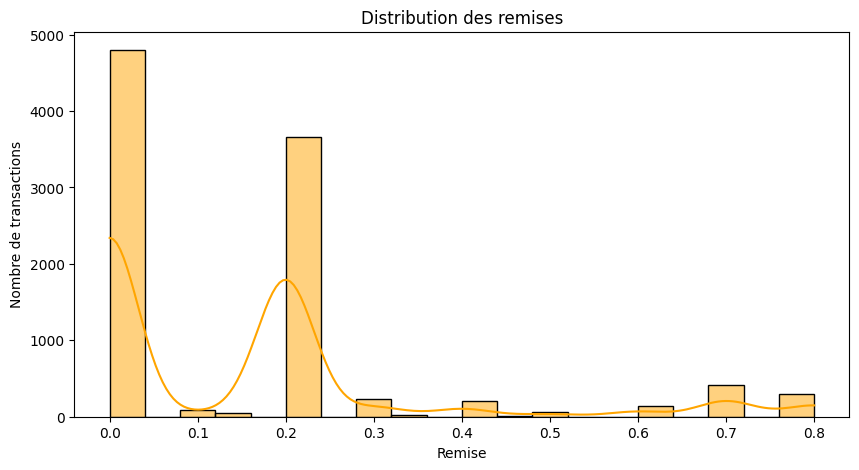

In [34]:
# Histogramme de la distribution des rémises.
plt.figure(figsize=(10, 5))
sns.histplot(df['Discount'], bins=20, kde=True, color='orange')
plt.title("Distribution des remises")
plt.xlabel("Remise")
plt.ylabel("Nombre de transactions")
plt.show()

### Interprétation du graphique:
- On observe les remises les plus courantes par ordre croissant: 0 %, 20 %, 70%, 80%, 30% ...
- Cela permet de voir si des niveaux de remise extrêmes sont fréquents, ce qui peut alerter sur une politique trop agressive.

###  Effet des remises sur les profits, les ventes et la quantité.

In [35]:
discount_impact = df.groupby('Discount')[['Sales', 'Profit', 'Quantity']].mean().reset_index()
discount_impact['Marge (%)'] = (discount_impact['Profit'] / discount_impact['Sales']) * 100
discount_impact

,Discount,Sales,Profit,Quantity,Marge (%)
0,0.00,226.742074,66.900292,3.807211,29.505019
1,0.10,578.397351,96.055074,3.968085,16.607108
2,0.15,529.971567,27.288298,3.807692,5.149012
3,0.20,209.076940,24.702572,3.735302,11.815063
4,0.30,454.742974,-45.679636,3.740088,-10.045155
5,0.32,536.794770,-88.560656,3.888889,-16.498047
6,0.40,565.134874,-111.927429,3.815534,-19.805437
7,0.45,498.634000,-226.646464,4.090909,-45.453472
8,0.50,892.705152,-310.703456,3.651515,-34.804712
9,0.60,48.150000,-43.077212,3.630435,-89.464614


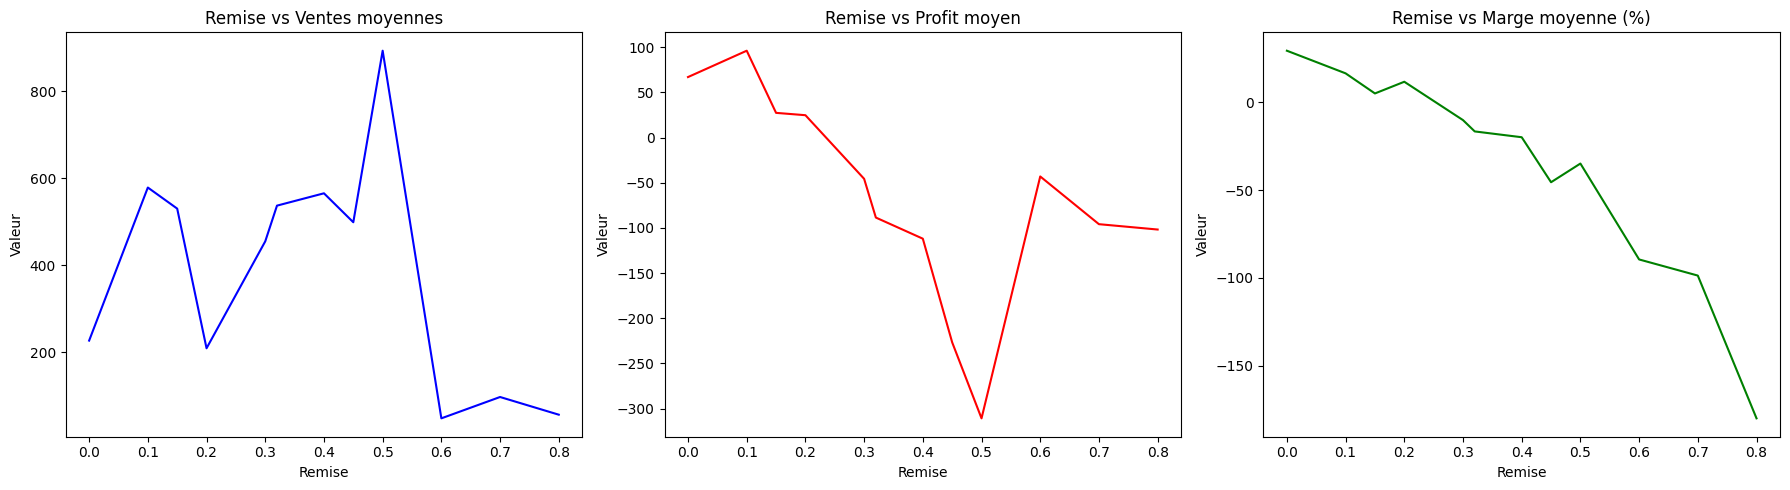

In [36]:
# Graphique comparatif
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.lineplot(data=discount_impact, x='Discount', y='Sales', ax=axes[0], color='blue')
axes[0].set_title("Remise vs Ventes moyennes")

sns.lineplot(data=discount_impact, x='Discount', y='Profit', ax=axes[1], color='red')
axes[1].set_title("Remise vs Profit moyen")

sns.lineplot(data=discount_impact, x='Discount', y='Marge (%)', ax=axes[2], color='green')
axes[2].set_title("Remise vs Marge moyenne (%)")

for ax in axes:
    ax.set_xlabel("Remise")
    ax.set_ylabel("Valeur")
plt.tight_layout()
plt.show()

### Interprétation des graphiques:
- Les ventes augmentent avec les remises comprises entre 20% et 50% (effet volume),
- Le profit chute drastiquement au-delà de 20-30%, ce qui montre une destruction de valeur,
- La marge devient négative au-delà de 10% : ces remises ne sont plus rentables.



###  Corrélations entre remise et autres variables.

In [37]:
# Matrice de corrélation
df[['Discount', 'Sales', 'Profit', 'Quantity']].corr()


,Discount,Sales,Profit,Quantity
Discount,1.000000,-0.028190,-0.219487,0.008623
Sales,-0.028190,1.000000,0.479064,0.200795
Profit,-0.219487,0.479064,1.000000,0.066253
Quantity,0.008623,0.200795,0.066253,1.000000


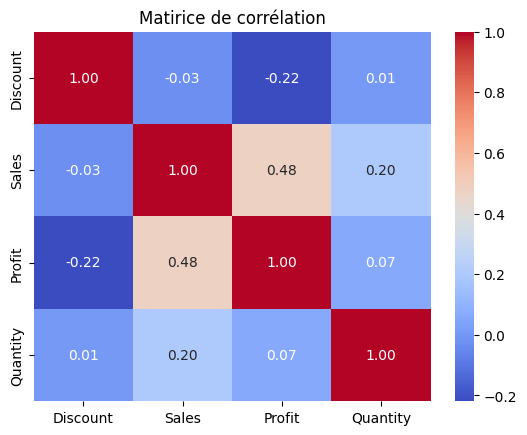

In [38]:
sns.heatmap(df[['Discount', 'Sales', 'Profit', 'Quantity']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matirice de corrélation')
plt.show()

### Test : seuil critique de rentabilité des remises

In [39]:
df['Discount_cat'] = pd.cut(df['Discount'],
                            bins=[-0.01, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0],
                            labels=['0%', '1-10%', '11-20%', '21-30%', '31-40%', '41-50%', '>50%'])

discount_grouped = df.groupby('Discount_cat')[['Sales', 'Profit', 'Quantity']].mean().reset_index()
discount_grouped['Marge (%)'] = (discount_grouped['Profit'] / discount_grouped['Sales']) * 100
discount_grouped.sort_values(by='Discount_cat')


C:\Users\HP 840 G3\AppData\Local\Temp\ipykernel_6576\1872724787.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_grouped = df.groupby('Discount_cat')[['Sales', 'Profit', 'Quantity']].mean().reset_index()


,Discount_cat,Sales,Profit,Quantity,Marge (%)
0,0%,226.742074,66.900292,3.807211,29.505019
1,1-10%,578.397351,96.055074,3.968085,16.607108
2,11-20%,213.575867,24.738824,3.736317,11.583155
3,21-30%,454.742974,-45.679636,3.740088,-10.045155
4,31-40%,561.850827,-109.219691,3.824034,-19.439269
5,41-50%,836.409273,-298.695314,3.714286,-35.711622
6,>50%,75.033572,-89.438144,3.912383,-119.197502


### Interprétation des résultats:
- Les rémises entre 0 et 20% sont généralement profitables, au-delà de 20% la marge devient  négative

### Impacte des couts sur la marge

### Corrélation entre prix de vente et marges

### Analyse de corrélation entre les produits et les performances régionale.

In [42]:
# Fonction de vérification de la p-value

def test_p_values(p):
    if p > 0.05:
        print("Variables indépendantes, car p-value > 5% ")
        print("Donc les 2 variables ne sont pas corréler !")
        print("p-value :",p)
    else:
        print("On rejète H0, car p-value < 5%")
        print("Donc les 2 variables sont corréler !")
        print("p-value :",p)

In [43]:
# Quantité vendu par produit et par région
df.groupby(['Category','Region'], as_index=False).agg(
   Quntité_vendu=("Quantity","sum")
)

,Category,Region,Quntité_vendu
0,Furniture,Central,1827
1,Furniture,East,2214
2,Furniture,South,1291
3,Furniture,West,2696
4,Office Supplies,Central,5409
5,Office Supplies,East,6462
6,Office Supplies,South,3800
7,Office Supplies,West,7235
8,Technology,Central,1544
9,Technology,East,1942


In [44]:
# Analyse du lien entre le produit et la région de vente. Analyse Quantitatif/Quantitatif
X = "Category"
Y = "Region"

Prod_Reg = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
Prod_Reg

Region,Central,East,South,West,Total
Category,,,,,
Furniture,481,601,332,707,2121
Office Supplies,1422,1712,995,1897,6026
Technology,420,535,293,599,1847
Total,2323,2848,1620,3203,9994


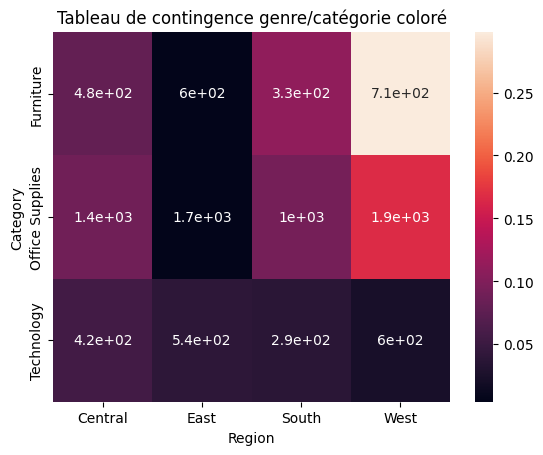

In [45]:
# Head map
tx = Prod_Reg.loc[:,["Total"]]
ty = Prod_Reg.loc[["Total"],:]
n = len(df)
indep = tx.dot(ty) / n

c = Prod_Reg.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title("Tableau de contingence genre/catégorie coloré")
plt.show()

In [46]:
# Le lien entre le genre d'un client et les catégories de livres achetés - Analyse QUALITATIF / QUALITATIF

Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(Prod_Reg)
print(Khi2_obs)
test_p_values(p_value)

3.661930938326572
Variables indépendantes, car p-value > 5% 
Donc les 2 variables ne sont pas corréler !
p-value : 0.9887935824497435


### Analyse de corrélation entre les produits et les marges.

In [50]:
# Groupement par produit, catégorie et Marge.
Marge_Total_Categ_Groupe=df.groupby(['Category','Product ID'], as_index=False).agg(
   Marge_Total=("Marge(%)","sum")
)
Marge_Total_Categ_Groupe = Marge_Total_Categ_Groupe.rename(columns={'Marge Nette':'Marge Totale'})
Marge_Total_Categ_Groupe= Marge_Total_Categ_Groupe.reset_index()
Marge_Total_Categ_Groupe



,index,Category,Product ID,Marge_Total
0,0,Furniture,FUR-BO-10000112,-14.285714
1,1,Furniture,FUR-BO-10000330,11.647059
2,2,Furniture,FUR-BO-10000362,49.161765
3,3,Furniture,FUR-BO-10000468,-142.000000
4,4,Furniture,FUR-BO-10000711,54.000000
...,...,...,...,...
1857,1857,Technology,TEC-PH-10004912,51.500000
1858,1858,Technology,TEC-PH-10004922,68.750000
1859,1859,Technology,TEC-PH-10004924,62.750000
1860,1860,Technology,TEC-PH-10004959,31.250000


C:\Users\HP 840 G3\AppData\Local\Temp\ipykernel_6576\4152056381.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops,


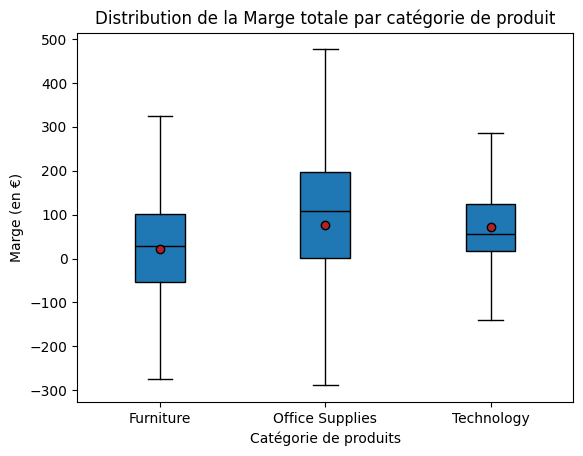

In [51]:
# Création de liste contenant les marges pour chaque Categorie
X = "Category" # qualitative
Y = "Marge_Total" # quantitative
modalites = Marge_Total_Categ_Groupe[X].unique()
groupes = []
for m in modalites:
    groupes.append(Marge_Total_Categ_Groupe[Marge_Total_Categ_Groupe[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}


plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Distribution de la Marge totale par catégorie de produit")
plt.ylabel("Marge (en €)")
plt.xlabel("Catégorie de produits")
plt.show()

In [52]:
A = Marge_Total_Categ_Groupe['Marge_Total'][Marge_Total_Categ_Groupe['Category'] == 'Technology']
B = Marge_Total_Categ_Groupe['Marge_Total'][Marge_Total_Categ_Groupe['Category'] == 'Furniture']
C = Marge_Total_Categ_Groupe['Marge_Total'][Marge_Total_Categ_Groupe['Category'] == 'Office Supplies']


#perform Bartlett's test 
stats.bartlett(A, B, C)

BartlettResult(statistic=np.float64(294.78981605634425), pvalue=np.float64(9.709676993848877e-65))

In [53]:
df.to_csv("superstore_cleaned.csv", index=False)